#Question identification

**Problem**

---




  An EdTech company has hired you as a machine learning engineer. The first task they provide you is to build a model that can identify questions within transcripts of video lectures. You are given the attached data set which has been painstakingly annotated, with each sentence being classified as a question or a sentence. During your NLP course at university you had learned various methods for vecotrization of text and numerous classification algorithms in your Machine Learning course. You had also learned about methods for evaluating models and selecting the best model.

Using all these skills, build a pipeline that does various clearning of the text sentences, use all vectorization approaches you have been introduced to (both semantic and syntactic), build models for discriminating between questions and general sentences and evaluate the models using ROC curves.  

1. Use tfidf, LSA, LDA and one word embedding and one sentence embedding method to vectorize the texts.
2. Use 4 modelling techniques. Logistic regression, Naive bayes, random forest, Decision tree and LSTM (optional)
3. Evaluate using area under the ROC curve
4. Create a Restful API
5. Dockerize it

**Algorithm**


---


1. Data preprocessing;


* Upload the data and read the data
* Text cleaning (remove punctuation, lowercase conversion, etc.).
* Removal of stop words (experiments!)
* Tokenization and Lemmatization
* Splitting the data( Test and Training sets)

2. Vectorization methods;
* TF-IDF Vectorization.
* Latent Semantic Analysis (LSA) Vectorization.
* Latent Dirichlet Allocation (LDA) Vectorization.
* Word Embedding (Word2Vec, GloVe, etc.).
* Sentence Embedding (Universal Sentence Encoder, BERT, etc.).

3. Model building;
* Logistic Regression
* Naive Bayes
* Random Forest
* Decision tree
* Long short term memory (LSTM) : optional
4. Model evaluation: ROC curves

5. Creating a RESTful API;
Implementing a Flask application for serving the best model.
6. Dockerization;
Creating a Dockerfile for containerizing the Flask application.



**Theory**

---
Natural Language Processing (NLP) is the branch of machine learning that helps computers interpret natural human language.
Vectorization method is a technique to transform data in to numerical vectors, making it easier for algorithms to process. There are many vectorization methods;
* TF-IDF (Term Frequency-Inverse Document Frequency):it identify significant words by considering both their frequency in a specific document and their rarity across the entire corpus.
* LSA (Latent Semantic Analysis): it is a dimensionality reduction technique that reformulates text data by projecting features from a higher-dimensional space into a lower-dimensional one
* LDA (Linear Discriminant Analysis): it is also a dimensionality reduction technique.
* Word Embedding: THey are numeric representations of words in a lower-dimensional space, capturing semantic and syntactic information.
* Sentence Embedding: In this, entire sentences are represent as vectors in a continous vector space.

Logistic Regression is a commonly used method for predicting probabilities of categorical outcomes.

Naive Bayes is a  probabilistic classifier that depends on the features being independent of each other.

Random Forest combines multiple decision trees to make more precise predictions. Decision Trees, work by dividing data into smaller subsets based on feature values.

Long Short-Term Memory (LSTM) is a recurrent neural network (RNN) for handling sequence data by remembering long-term dependencies.

Receiver Operating Characteristic (ROC) curves help us understand how well a binary classification model performs. They show the relationship between true positives and false positives.

Using Flask, we can turn our best model into a web application. This enable people to use the model through a web browser or other applications via HTTP requests.
We can also use Docker to package the Flask app and its dependencies into a container. This makes it easier to deploy and run the app consistently across different servers or devices.

The ROC curve is a graphical representation of the true positive rate against the false positive rate for different threshold values. The area under the ROC curve (AUC-ROC) is a commonly used metric to quantify the performance of a binary classification model

AUC-ROC measures the model's ability to discriminate between the positive and negative classes. A higher AUC-ROC value indicates that the model is better at distinguishing between the classes.

AUC-ROC can be used to compare different models. A model with a higher AUC-ROC value is generally considered to be better at classification than a model with a lower AUC-ROC value.

# Data Preprocessing

In [ ]:
# Packages
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
import nltk
# nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

**Do I need to remove stopwords**


---


Removal of stopwords can causes the removal of Common words (a,an,the,he,she..),**Question words**(who,what..),modal verbs, auxillary verbs and numbers.
Stopwords like 'what', 'where', 'when', 'why', 'how', etc., are question words that can provide context about whether a sentence is a question or not. Removing these stopwords might make it harder for the model to identify questions.
Some stopwords are crucial for maintaining the syntactic structure of a sentence.
So I will experiment the TF-IDF Vectorization method and model with;


1.   Without stopwords
2.   With stopwords



# Experiment1: Without stopwords

In [ ]:
# Load the data
data = pd.read_csv("/content/drive/MyDrive/ML assignments/Assig_4_data.csv")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text cleaning and preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(' +', ' ', text)

    # Tokenization ,Lemmatization, removal of stop words
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply
data['cleaned_text'] = data['sentence'].apply(preprocess_text)
data["label"] = (data["label"] == "question").astype(int)


data = data.drop('sentence', axis=1)
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data

,label,cleaned_text
0,0,beyoncé giselle knowlescarter biːˈjɒnseɪ beeyo...
1,0,born raised houston texas performed various si...
2,0,managed father mathew knowles group became one...
3,0,hiatus saw release beyoncés debut album danger...
4,0,following disbandment destiny child june relea...
...,...,...
235105,0,hi teensuser
235106,0,join
235107,0,hi teensuser
235108,0,know teensuser


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_tfidf.shape

(47022, 100)

In [ ]:
#packages and models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='saga')
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict_proba(X_test_tfidf)[:, 1]
print(f"Logistic Regression ROC AUC: {roc_auc_score(y_test, lr_pred)}")

Logistic Regression ROC AUC: 0.9712361102311082


In [ ]:
# Naive Bayes
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict_proba(X_test_tfidf)[:, 1]
print(f"Naive Bayes ROC AUC: {roc_auc_score(y_test, nb_pred)}")

Naive Bayes ROC AUC: 0.8344838836697928


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=50)
rf.fit(X_train_tfidf, y_train)
rf_pred = rf.predict_proba(X_test_tfidf)[:, 1]
print(f"Random Forest ROC AUC: {roc_auc_score(y_test, rf_pred)}")

Random Forest ROC AUC: 0.8800997978984549


The maximum feature in TF-IDF vectorizer was given 10000.

In decision tree even with maximum depth of 10, the session is crashing due to memory RAM error.

So I defined a new TF-IDF vectorizer with low feature(1000) and a decision tree model with maximum depth of 10.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf_dt = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf_dt = tfidf_vectorizer.transform(X_test)
X_test_tfidf_dt.shape

(47022, 1000)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_tfidf_dt.toarray(), y_train)
dt_pred = dt.predict_proba(X_test_tfidf_dt)[:, 1]
print(f"Decision Tree ROC AUC: {roc_auc_score(y_test, dt_pred)}")

Decision Tree ROC AUC: 0.6166944944116995


In [ ]:
# Convert scaled arrays back to lists of strings
X_train_text = [' '.join(map(str, row)) for row in X_train_tfidf]
X_test_text = [' '.join(map(str, row)) for row in X_test_tfidf]
tokenizer = Tokenizer(num_words=5000)
# Tokenization
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

In [ ]:
# LSTM
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

lstm = Sequential([
    Embedding(5000, 32, input_length=100),
    LSTM(32),
    Dense(1, activation='sigmoid') #with sigmoid activation function
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.fit(X_train_pad, y_train, epochs=5, batch_size=128, verbose=1)
lstm_pred = lstm.predict(X_test_pad).ravel()
lstm_pred = np.where(lstm_pred > 0.5, 1, 0)
print(f"LSTM ROC AUC: {roc_auc_score(y_test, lstm_pred)}")

Epoch 1/5
1470/1470 [==============================] - 125s 82ms/step - loss: 0.3440 - accuracy: 0.8533
Epoch 2/5
1470/1470 [==============================] - 150s 102ms/step - loss: 0.2917 - accuracy: 0.8787
Epoch 3/5
1470/1470 [==============================] - 160s 109ms/step - loss: 0.2783 - accuracy: 0.8834
Epoch 4/5
1470/1470 [==============================] - 109s 74ms/step - loss: 0.2700 - accuracy: 0.8870
Epoch 5/5
1470/1470 [==============================] - 17s 12ms/step
LSTM ROC AUC: 0.8600520084940585


In [52]:
#Plotting
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

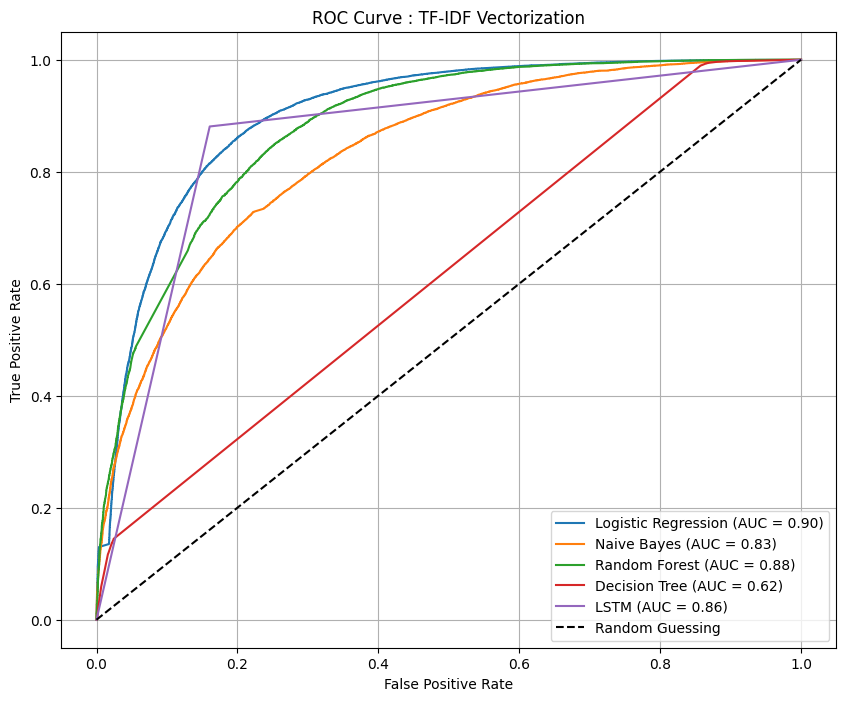

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred)

lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_pred)
lstm_auc = roc_auc_score(y_test, lstm_pred)

# Plot ROC curves
plt.figure(figsize=(10, 8))


plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM (AUC = {lstm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : TF-IDF Vectorization')
plt.legend()
plt.grid(True)
plt.show()

#Experiment2: with stopwords in Preprocessed data

In [ ]:
#with stopwords
# Text cleaning and preprocessing by keeping stopwords
data_keep = pd.read_csv("/content/drive/MyDrive/ML assignments/Assig_4_data.csv")
def preprocess_text_keep_stopwords(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(' +', ' ', text)

    # Tokenization and Lemmatization
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


data_keep['cleaned_text'] = data_keep['sentence'].apply(preprocess_text_keep_stopwords)
data_keep["label"] = (data_keep["label"] == "question").astype(int)

# Drop the original 'sentence' column
data_keep = data_keep.drop('sentence', axis=1)
data_keep = data_keep.drop('Unnamed: 0', axis=1)

In [ ]:
data_keep

In [ ]:
#split the data_keep(which contain stopwords)
X_train_, X_test_, y_train_, y_test_ = train_test_split(data_keep['cleaned_text'], data_keep['label'], test_size=0.2, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_train_tfidf_ = tfidf_vectorizer.fit_transform(X_train_)
X_test_tfidf_ = tfidf_vectorizer.transform(X_test_)
X_test_tfidf_.shape

(47022, 100)

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='saga')
lr.fit(X_train_tfidf_, y_train)
lr_pred = lr.predict_proba(X_test_tfidf_)[:, 1]
print(f"Logistic Regression ROC AUC: {roc_auc_score(y_test_, lr_pred)}")
# Naive Bayes
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train_tfidf_, y_train_)
nb_pred = nb.predict_proba(X_test_tfidf_)[:, 1]
print(f"Naive Bayes ROC AUC: {roc_auc_score(y_test_, nb_pred)}")


Logistic Regression ROC AUC: 0.9879187745764196
Naive Bayes ROC AUC: 0.9726320665158927
Random Forest ROC AUC: 0.9911620817163144


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
rf.fit(X_train_tfidf_, y_train_)
rf_pred = rf.predict_proba(X_test_tfidf_)[:, 1]
print(f"Random Forest ROC AUC: {roc_auc_score(y_test_, rf_pred)}")

Random Forest ROC AUC: 0.9844805936719843


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_tfidf_, y_train)
dt_pred = dt.predict_proba(X_test_tfidf_)[:, 1]
print(f"Decision Tree ROC AUC: {roc_auc_score(y_test_, dt_pred)}")

Decision Tree ROC AUC: 0.9785662503338682


In [ ]:
# Convert scaled arrays back to lists of strings
X_train_text = [' '.join(map(str, row)) for row in X_train_tfidf_]
X_test_text = [' '.join(map(str, row)) for row in X_test_tfidf_]
tokenizer = Tokenizer(num_words=5000)
# Tokenization
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)
# LSTM
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

lstm = Sequential([
    Embedding(5000, 32, input_length=100),
    LSTM(32),
    Dense(1, activation='sigmoid') #with sigmoid activation function
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.fit(X_train_pad, y_train, epochs=5, batch_size=128, verbose=1)
lstm_pred = lstm.predict(X_test_pad).ravel()
lstm_pred = np.where(lstm_pred > 0.5, 1, 0)
print(f"LSTM ROC AUC: {roc_auc_score(y_test, lstm_pred)}")


Epoch 1/5
1470/1470 [==============================] - 125s 84ms/step - loss: 0.1555 - accuracy: 0.9424
Epoch 2/5
1470/1470 [==============================] - 123s 84ms/step - loss: 0.1164 - accuracy: 0.9600
Epoch 3/5
1470/1470 [==============================] - 136s 93ms/step - loss: 0.1137 - accuracy: 0.9606
Epoch 4/5
1470/1470 [==============================] - 97s 66ms/step - loss: 0.1127 - accuracy: 0.9607
Epoch 5/5
1470/1470 [==============================] - 18s 12ms/step
LSTM ROC AUC: 0.9568290521988834


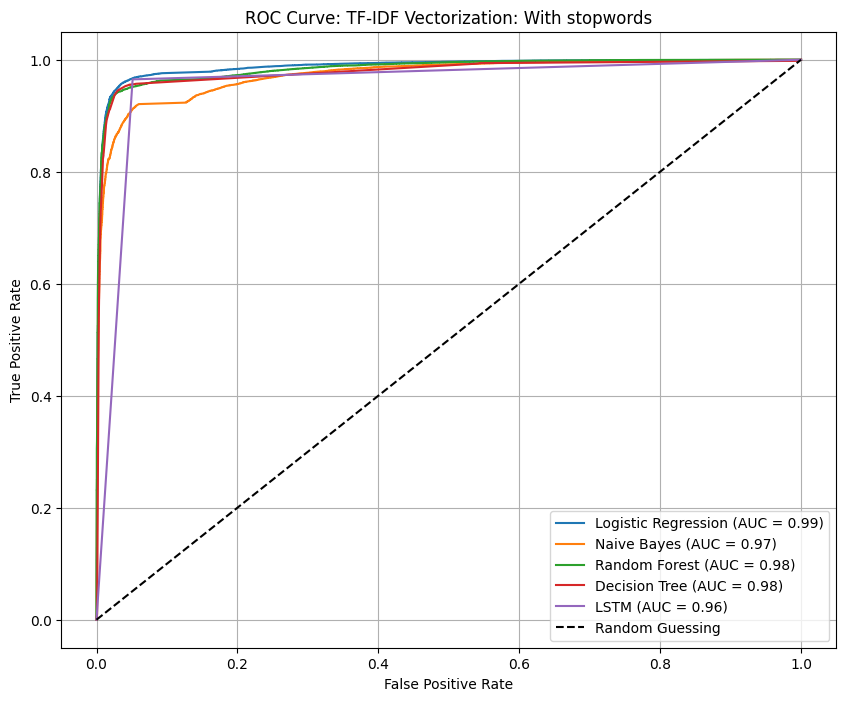

In [ ]:
#plotting
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred)

lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_pred)
lstm_auc = roc_auc_score(y_test, lstm_pred)

# Plot ROC curves
plt.figure(figsize=(10, 8))


plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM (AUC = {lstm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: TF-IDF Vectorization: With stopwords')
plt.legend()
plt.grid(True)
plt.show()

**Inference;**


---


* Model trained with data (With stopwords) shows a greater accuracy and AUC curve than model trained with data (without stopwords).
* This shows the advantage of keeping question words in the data as model predicts it more and efficiently.

**My solution to tackle the problem of stopwords**


---

I will define a new function "preprocess_text_kq" that will remove stopwords but **keep question words**.

# TF-IDF Vectorization

In [37]:
#packages and models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [38]:
# Load the data
data_q = pd.read_csv("/content/drive/MyDrive/ML assignments/Assig_4_data.csv")

# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Extend the list of stopwords to exclude question words
question_words = ['what', 'when', 'where', 'which', 'who', 'whom', 'why', 'how']
for word in question_words:
    stop_words.remove(word)


def preprocess_text_kq(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(' +', ' ', text)

    # Tokenization, Lemmatization, and removal of stopwords
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Add back question words
    tokens = [word for word in tokens if word in question_words or word not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing
data_q['cleaned_text'] = data_q['sentence'].apply(preprocess_text_kq)
data_q["label"] = (data_q["label"] == "question").astype(int)

# Drop unnecessary columns
data_q = data_q.drop('sentence', axis=1)
data_q = data_q.drop('Unnamed: 0', axis=1)

In [ ]:
data_q

,label,cleaned_text
0,0,beyoncé giselle knowlescarter biːˈjɒnseɪ beeyo...
1,0,born raised houston texas performed various si...
2,0,managed father mathew knowles group became one...
3,0,hiatus saw release beyoncés debut album danger...
4,0,following disbandment destiny child june relea...
...,...,...
235105,0,hi teensuser
235106,0,join
235107,0,hi teensuser
235108,0,know teensuser


**Splitting the dataset**

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_q['cleaned_text'], data_q['label'], test_size=0.2, random_state=42)

In the preprocessing of dataset, I removed stopwords (excluding question words), performed text cleaning like converting text to lowercase, removing digits, punctuation and finally performed tokenization and lemmatization.

In [39]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_tfidf.shape

(47022, 100)

In [ ]:
# Logistic Regression
lr_best = LogisticRegression(max_iter=1000, solver='saga')
lr_best.fit(X_train_tfidf, y_train)
lr_pred = lr_best.predict_proba(X_test_tfidf)[:, 1]
print(f"Logistic Regression ROC AUC: {roc_auc_score(y_test, lr_pred)}")

Logistic Regression ROC AUC: 0.9712357519836365


In [ ]:
# Naive Bayes
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict_proba(X_test_tfidf)[:, 1]
print(f"Naive Bayes ROC AUC: {roc_auc_score(y_test, nb_pred)}")

Naive Bayes ROC AUC: 0.9261844936414123


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
rf.fit(X_train_tfidf, y_train)
rf_pred = rf.predict_proba(X_test_tfidf)[:, 1]
print(f"Random Forest ROC AUC: {roc_auc_score(y_test, rf_pred)}")

Random Forest ROC AUC: 0.9706538065230552


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_tfidf, y_train)
dt_pred = dt.predict_proba(X_test_tfidf)[:, 1]
print(f"Decision Tree ROC AUC: {roc_auc_score(y_test, dt_pred)}")

Decision Tree ROC AUC: 0.9697552492954871


In [ ]:
# Convert scaled arrays back to lists of strings
X_train_text = [' '.join(map(str, row)) for row in X_train_tfidf]
X_test_text = [' '.join(map(str, row)) for row in X_test_tfidf]
tokenizer = Tokenizer(num_words=5000)
# Tokenization
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)
# LSTM
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

lstm = Sequential([
    Embedding(5000, 32, input_length=100),
    LSTM(32),
    Dense(1, activation='sigmoid') #with sigmoid activation function
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.fit(X_train_pad, y_train, epochs=5, batch_size=128, verbose=1)
lstm_pred = lstm.predict(X_test_pad).ravel()
lstm_pred = np.where(lstm_pred > 0.5, 1, 0)
print(f"LSTM ROC AUC: {roc_auc_score(y_test, lstm_pred)}")

Epoch 1/5
1470/1470 [==============================] - 142s 95ms/step - loss: 0.2138 - accuracy: 0.9198
Epoch 2/5
1470/1470 [==============================] - 128s 87ms/step - loss: 0.1765 - accuracy: 0.9371
Epoch 3/5
1470/1470 [==============================] - 136s 93ms/step - loss: 0.1742 - accuracy: 0.9372
Epoch 4/5
1470/1470 [==============================] - 140s 95ms/step - loss: 0.1730 - accuracy: 0.9380
Epoch 5/5
1470/1470 [==============================] - 18s 12ms/step
LSTM ROC AUC: 0.93119565192949


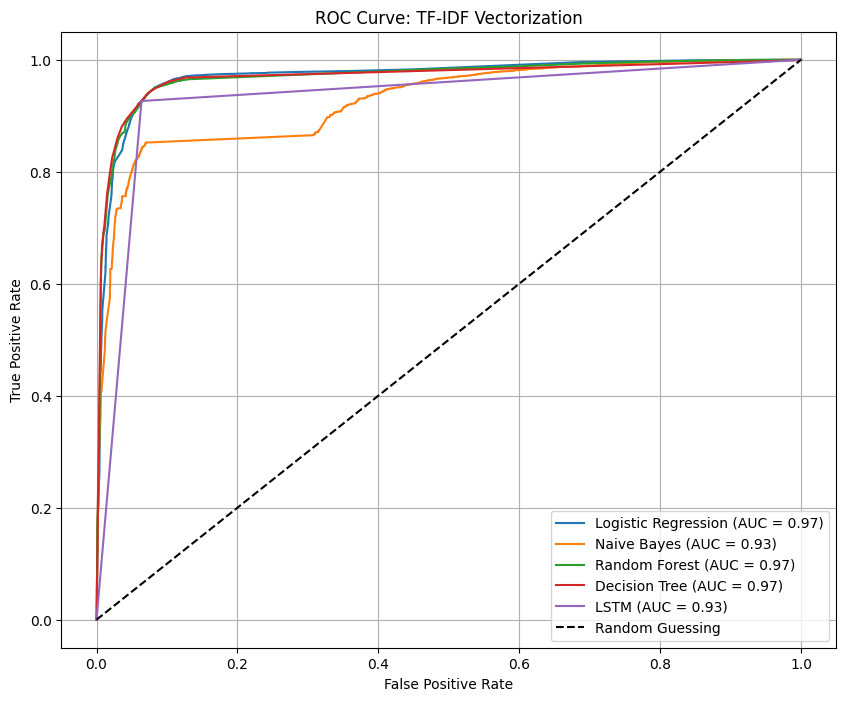

In [ ]:
#plotting
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred)

lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_pred)
lstm_auc = roc_auc_score(y_test, lstm_pred)

# Plot ROC curves
plt.figure(figsize=(10, 8))


plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM (AUC = {lstm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: TF-IDF Vectorization')
plt.legend()
plt.grid(True)
plt.show()

#LSA Vectorizer

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# LSA Vectorization
lsa_vectorizer = TruncatedSVD(n_components=100)
X_train_lsa = lsa_vectorizer.fit_transform(X_train_tfidf)
X_test_lsa = lsa_vectorizer.transform(X_test_tfidf)

In [ ]:
# MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_lsa)
X_test_scaled = scaler.transform(X_test_lsa)

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='saga')
lr.fit(X_train_lsa, y_train)
lr_pred = lr.predict_proba(X_test_lsa)[:, 1]
print(f"Logistic Regression ROC AUC: {roc_auc_score(y_test, lr_pred)}")

# Naive Bayes
# Data scaled with Minmax scaler
nb = MultinomialNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict_proba(X_test_scaled)[:, 1]
print(f"Naive Bayes ROC AUC: {roc_auc_score(y_test, nb_pred)}")

Logistic Regression ROC AUC: 0.9712312472513233
Naive Bayes ROC AUC: 0.9519726862133248


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
rf.fit(X_train_lsa, y_train)
rf_pred = rf.predict_proba(X_test_lsa)[:, 1]
print(f"Random Forest ROC AUC: {roc_auc_score(y_test, rf_pred)}")

Random Forest ROC AUC: 0.971318496126643


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_lsa, y_train)
dt_pred = dt.predict_proba(X_test_lsa)[:, 1]
print(f"Decision Tree ROC AUC: {roc_auc_score(y_test, dt_pred)}")

Decision Tree ROC AUC: 0.9702787958252344


In [ ]:
# Convert scaled arrays back to lists of strings
X_train_text = [' '.join(map(str, row)) for row in X_train_lsa]
X_test_text = [' '.join(map(str, row)) for row in X_test_lsa]
tokenizer = Tokenizer(num_words=5000)
# Tokenization
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)
# LSTM
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

lstm = Sequential([
    Embedding(5000, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.fit(X_train_pad, y_train, epochs=5, batch_size=256, verbose=1)
lstm_pred = lstm.predict(X_test_pad).ravel()
lstm_pred = np.where(lstm_pred > 0.5, 1, 0)
print(f"LSTM ROC AUC: {roc_auc_score(y_test, lstm_pred)}")


Epoch 1/5
735/735 [==============================] - 70s 93ms/step - loss: 0.4787 - accuracy: 0.7369
Epoch 2/5
735/735 [==============================] - 68s 93ms/step - loss: 0.4599 - accuracy: 0.7526
Epoch 3/5
735/735 [==============================] - 70s 95ms/step - loss: 0.4594 - accuracy: 0.7534
Epoch 4/5
735/735 [==============================] - 91s 124ms/step - loss: 0.4564 - accuracy: 0.7554
Epoch 5/5
1470/1470 [==============================] - 28s 18ms/step
LSTM ROC AUC: 0.7669772484856934


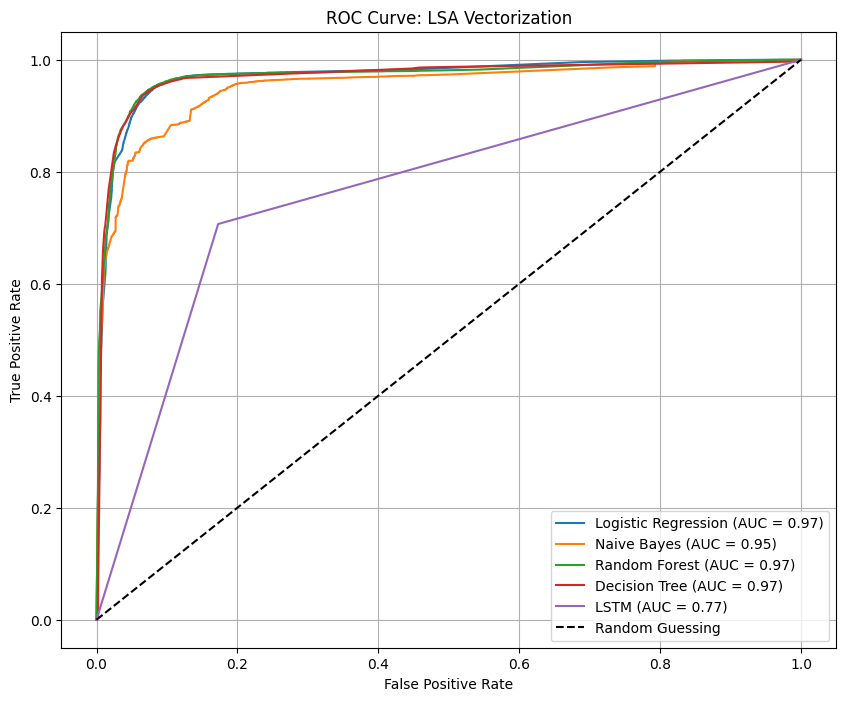

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred)

lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_pred)
lstm_auc = roc_auc_score(y_test, lstm_pred)

# Plot ROC curves
plt.figure(figsize=(10, 8))


plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM (AUC = {lstm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: LSA Vectorization')
plt.legend()
plt.grid(True)
plt.show()

#LDA Vectorizer

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42, max_iter=10)
X_train_lda = lda.fit_transform(X_train_tfidf)
X_test_lda = lda.transform(X_test_tfidf)


In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='saga')
lr.fit(X_train_lda, y_train)
lr_pred = lr.predict_proba(X_test_lda)[:, 1]
print(f"Logistic Regression ROC AUC: {roc_auc_score(y_test, lr_pred)}")
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_lda, y_train)
nb_pred = nb.predict_proba(X_test_lda)[:, 1]
print(f"Naive Bayes ROC AUC: {roc_auc_score(y_test, nb_pred)}")

Logistic Regression ROC AUC: 0.7018748322942541
Naive Bayes ROC AUC: 0.6942410590874053


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
rf.fit(X_train_lda, y_train)
rf_pred = rf.predict_proba(X_test_lda)[:, 1]
print(f"Random Forest ROC AUC: {roc_auc_score(y_test, rf_pred)}")

Random Forest ROC AUC: 0.9501549890630538


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_lda, y_train)
dt_pred = dt.predict_proba(X_test_lda)[:, 1]
print(f"Decision Tree ROC AUC: {roc_auc_score(y_test, dt_pred)}")

Decision Tree ROC AUC: 0.939414904386726


In [ ]:
from keras.layers import concatenate
from sklearn.preprocessing import StandardScaler

# LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Standardize LDA values
scaler = StandardScaler()
X_train_lda_scaled = scaler.fit_transform(X_train_lda)
X_test_lda_scaled = scaler.transform(X_test_lda)

# Concatenate LSTM input
X_train_combined = np.concatenate((X_train_pad, X_train_lda_scaled[:, :10]), axis=1)
X_test_combined = np.concatenate((X_test_pad, X_test_lda_scaled[:, :10]), axis=1)

lstm = Sequential([
    Embedding(5000, 32),
    LSTM(32),
    Dense(64, activation='relu'),  # Add a dense layer for combined features
    Dense(1, activation='sigmoid')
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.fit(X_train_combined, y_train, epochs=5, batch_size=128, verbose=1)
lstm_pred = lstm.predict(X_test_combined).ravel()
lstm_pred = np.where(lstm_pred > 0.5, 1, 0)
print(f"LSTM ROC AUC: {roc_auc_score(y_test, lstm_pred)}")

Epoch 1/5
1470/1470 [==============================] - 130s 87ms/step - loss: 0.1447 - accuracy: 0.9438
Epoch 2/5
1470/1470 [==============================] - 127s 86ms/step - loss: 0.0734 - accuracy: 0.9763
Epoch 3/5
1470/1470 [==============================] - 124s 84ms/step - loss: 0.0615 - accuracy: 0.9803
Epoch 4/5
1470/1470 [==============================] - 172s 117ms/step - loss: 0.0519 - accuracy: 0.9831
Epoch 5/5
1470/1470 [==============================] - 25s 17ms/step
LSTM ROC AUC: 0.9764151579818441


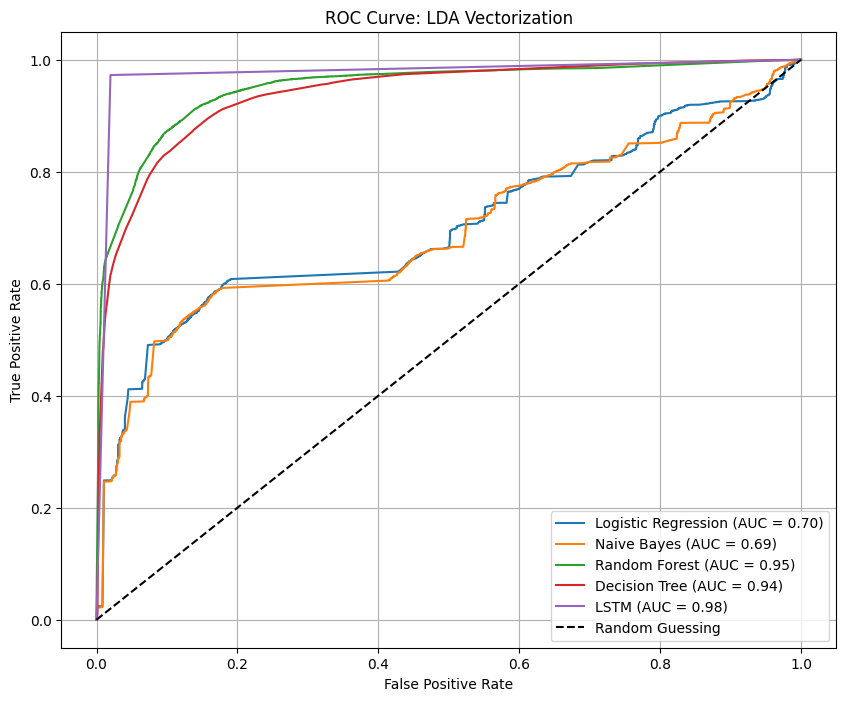

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred)

lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_pred)
lstm_auc = roc_auc_score(y_test, lstm_pred)

# Plot ROC curves
plt.figure(figsize=(10, 8))


plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM (AUC = {lstm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: LDA Vectorization')
plt.legend()
plt.grid(True)
plt.show()

#Word embedding

In [41]:
from gensim.models import Word2Vec

In [42]:
# Tokenize
sentences = [sentence.split(' ') for sentence in data_q['cleaned_text']]

# Train a Word2Vec model
word2vec = Word2Vec(sentences, min_count=2)


word2vec_dict = {word: word2vec.wv[word] for word in word2vec.wv.index_to_key}
def vectorize_sentence(sentence):
    return np.mean([word2vec_dict[word] for word in sentence if word in word2vec_dict] or [np.zeros(100)], axis=0)

X_train_vec = np.array([vectorize_sentence(sentence) for sentence in X_train])
X_test_vec = np.array([vectorize_sentence(sentence) for sentence in X_test])

In [43]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

In [44]:
# Logistic Regression on Word2Vec vectors
lr_w2v = LogisticRegression(max_iter=10000)
lr_w2v.fit(X_train_scaled, y_train)
lr_pred_w2v = lr_w2v.predict_proba(X_test_scaled)[:, 1]
print(f"Logistic Regression with Word2Vec ROC AUC: {roc_auc_score(y_test, lr_pred_w2v)}")

Logistic Regression with Word2Vec ROC AUC: 0.9088638842441644


In [ ]:
# Naive Bayes on Word2Vec vectors (using Gaussian Naive Bayes as it supports continuous features)
from sklearn.naive_bayes import GaussianNB
nb_w2v = GaussianNB()
nb_w2v.fit(X_train_scaled, y_train)
nb_pred_w2v = nb_w2v.predict_proba(X_test_scaled)[:, 1]
print(f"Naive Bayes with Word2Vec ROC AUC: {roc_auc_score(y_test, nb_pred_w2v)}")

Naive Bayes with Word2Vec ROC AUC: 0.7024596676177751


In [ ]:
# Random Forest on Word2Vec vectors
rf_w2v = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_w2v.fit(X_train_vec, y_train)
rf_pred_w2v = rf_w2v.predict_proba(X_test_vec)[:, 1]
print(f"Random Forest with Word2Vec ROC AUC: {roc_auc_score(y_test, rf_pred_w2v)}")

Random Forest with Word2Vec ROC AUC: 0.8972905122738966


In [ ]:
# Decision Trees on Word2Vec vectors
dt_w2v = DecisionTreeClassifier(max_depth=10)
dt_w2v.fit(X_train_vec, y_train)
dt_pred_w2v = dt_w2v.predict_proba(X_test_vec)[:, 1]
print(f"Decision Trees with Word2Vec ROC AUC: {roc_auc_score(y_test, dt_pred_w2v)}")

Decision Trees with Word2Vec ROC AUC: 0.8709510512479953


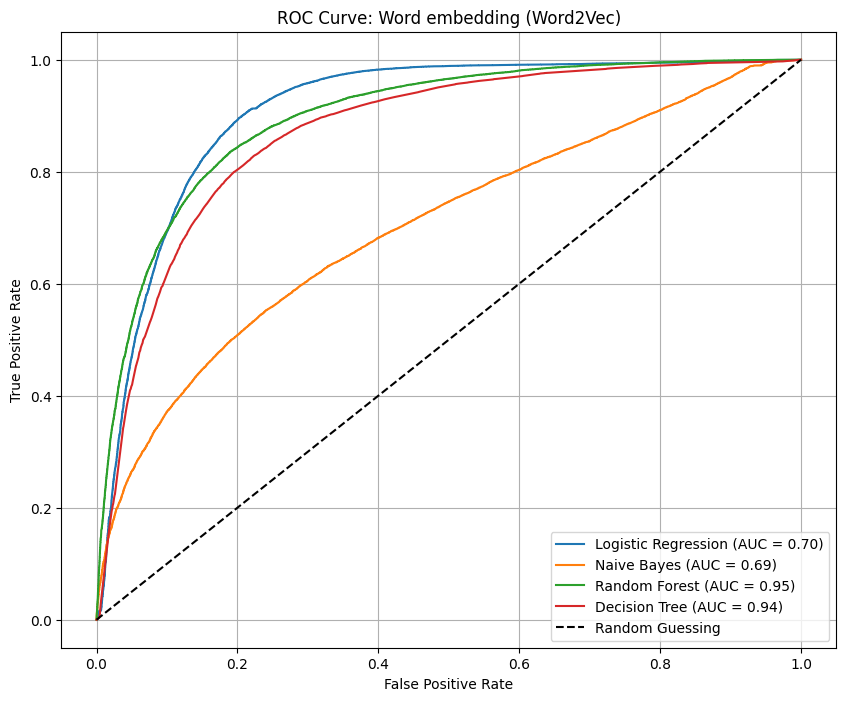

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_w2v)
lr_auc = roc_auc_score(y_test, lr_pred)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred_w2v)
nb_auc = roc_auc_score(y_test, nb_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_w2v)
rf_auc = roc_auc_score(y_test, rf_pred)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred_w2v)
dt_auc = roc_auc_score(y_test, dt_pred)

# Plot ROC curves
plt.figure(figsize=(10, 8))


plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Word embedding (Word2Vec)')
plt.legend()
plt.grid(True)
plt.show()

#Sentence embedding

In [ ]:
!pip install tensorflow tensorflow-hub


In [46]:
import tensorflow_hub as hub
import tensorflow as tf

# Load pre-trained USE model
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")



In [47]:
# Function to obtain USE embeddings in batches
def get_use_embedding_batch(sentences, batch_size=1000):
    embeddings_list = []
    sentence_list = sentences.tolist()
    for i in range(0, len(sentence_list), batch_size):
        batch_sentences = sentence_list[i:i+batch_size]

        # Get embeddings for the batch
        embeddings = use_model(batch_sentences)
        embeddings_list.append(embeddings.numpy())
    embeddings_array = np.concatenate(embeddings_list)

    return embeddings_array


X_train_use = get_use_embedding_batch(X_train)
X_test_use = get_use_embedding_batch(X_test)


In [48]:
X_train_use,
X_test_use

array([[ 0.02444166, -0.07694661, -0.06282476, ..., -0.01425316,
        -0.06229136, -0.05310824],
       [ 0.01148053, -0.0071432 ,  0.01287977, ...,  0.03006626,
         0.00432964, -0.04711358],
       [ 0.04379846,  0.05673354,  0.02974793, ...,  0.02844878,
        -0.03083456,  0.03151107],
       ...,
       [ 0.04314719, -0.07412521,  0.05306599, ..., -0.04061255,
        -0.04818163,  0.01095948],
       [-0.02319229,  0.00956997,  0.07841552, ...,  0.02180262,
        -0.06930564,  0.04905875],
       [-0.03554273, -0.00681663, -0.01798568, ..., -0.00282937,
        -0.07590415, -0.07947582]], dtype=float32)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize Logistic Regression model
lr_b = LogisticRegression(max_iter=1000)

lr_b.fit(X_train_use, y_train)
y_pred_lr = lr_b.predict_proba(X_test_use)[:, 1]

auc_lr = roc_auc_score(y_test, y_pred_lr)
print(f"Logistic Regression AUC-ROC: {auc_lr:.4f}")


Logistic Regression AUC-ROC: 0.9946


In [55]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()

nb.fit(X_train_use, y_train)
y_pred_nb = nb.predict_proba(X_test_use)[:, 1]
auc_nb = roc_auc_score(y_test, y_pred_nb)
print(f"Naive Bayes AUC-ROC: {auc_nb:.4f}")


Naive Bayes AUC-ROC: 0.9912


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=2)


rf.fit(X_train_use, y_train)


y_pred_rf = rf.predict_proba(X_test_use)[:, 1]


auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest AUC-ROC: {auc_rf:.4f}")


Random Forest AUC-ROC: 0.9896


In [49]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt = DecisionTreeClassifier(max_depth=2)

# Fit the model
dt.fit(X_train_use, y_train)
y_pred_dt = dt.predict_proba(X_test_use)[:, 1]


auc_dt = roc_auc_score(y_test, y_pred_dt)
print(f"Decision Tree AUC-ROC: {auc_dt:.4f}")


Decision Tree AUC-ROC: 0.9624


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


X_train_lstm = X_train_use.reshape(X_train_use.shape[0], 1, X_train_use.shape[1])
X_test_lstm = X_test_use.reshape(X_test_use.shape[0], 1, X_test_use.shape[1])

# Initialize LSTM model
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=128, verbose=1)


y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Calculate AUC-ROC score
auc_lstm = roc_auc_score(y_test, y_pred_lstm)
print(f"LSTM AUC-ROC: {auc_lstm:.4f}")


Epoch 1/10
1470/1470 [==============================] - 37s 16ms/step - loss: 0.1276 - accuracy: 0.9575
Epoch 2/10
1470/1470 [==============================] - 17s 12ms/step - loss: 0.0739 - accuracy: 0.9766
Epoch 3/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.0712 - accuracy: 0.9771
Epoch 4/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.0697 - accuracy: 0.9774
Epoch 5/10
1470/1470 [==============================] - 15s 10ms/step - loss: 0.0687 - accuracy: 0.9777
Epoch 6/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.0674 - accuracy: 0.9780
Epoch 7/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.0660 - accuracy: 0.9785
Epoch 8/10
1470/1470 [==============================] - 14s 9ms/step - loss: 0.0645 - accuracy: 0.9789
Epoch 9/10
1470/1470 [==============================] - 13s 9ms/step - loss: 0.0630 - accuracy: 0.9793
Epoch 10/10
1470/1470 [==============================] - 5s 3ms/step
L

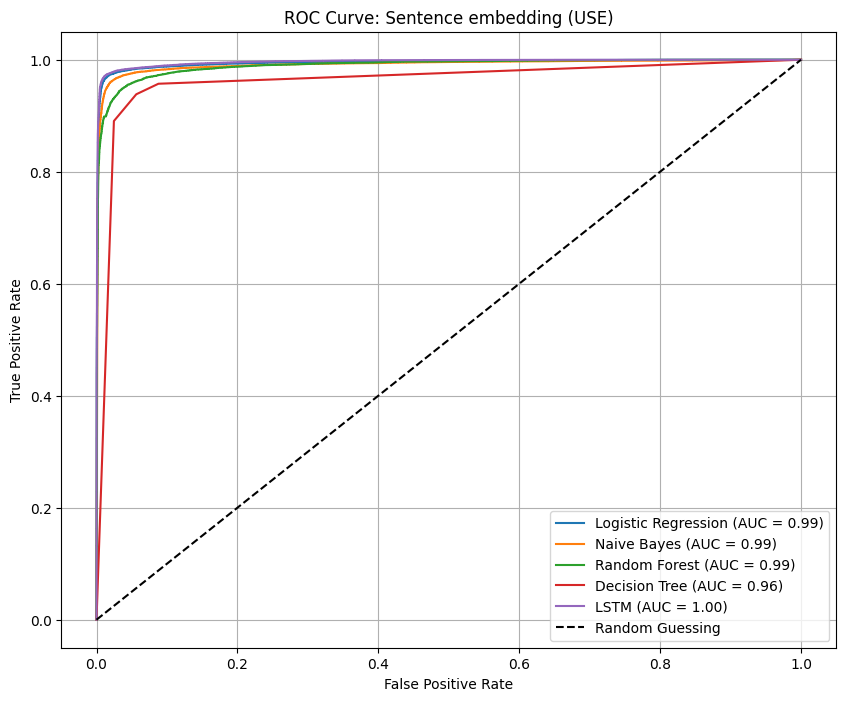

In [58]:
#plotting
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

nb_fpr, nb_tpr, _ = roc_curve(y_test, y_pred_nb)
auc_nb = roc_auc_score(y_test, y_pred_nb)

rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_dt)

lstm_fpr, lstm_tpr, _ = roc_curve(y_test, y_pred_lstm)
auc_lstm = roc_auc_score(y_test, y_pred_lstm)

# Plot ROC curves
plt.figure(figsize=(10, 8))


plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM (AUC = {auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Sentence embedding (USE)')
plt.legend()
plt.grid(True)
plt.show()

# Result

**Interpretation of AUC-ROC Values:**

---


* AUC-ROC = 0.5: The model performs no better than random guessing. It has no discriminative ability between the positive and negative classes.
* 0.5 < AUC-ROC < 0.7: The model has poor to fair discriminative ability.
* 0.7 ≤ AUC-ROC < 0.8: The model has good discriminative ability.
* 0.8 ≤ AUC-ROC < 0.9: The model has very good discriminative ability.
* AUC-ROC ≥ 0.9: The model has excellent discriminative ability.

**AUC-ROC Results**

**AUC-ROC Value for TF-IDF Vectorization;**


---
* Logisitic Regression: 0.97
* Naive Bayes: 0.93
* Random Forest: 0.97
* Decision tree: 0.97
* LSTM: 0.93

**AUC-ROC Value for LSA Vectorization;**

---
* Logisitic Regression: 0.97
* Naive Bayes: 0.95
* Random Forest: 0.97
* Decision tree: 0.97
* LSTM: 0.77

**AUC-ROC Value for LDA Vectorization;**

---
* Logisitic Regression: 0.70
* Naive Bayes: 0.69
* Random Forest: 0.95
* Decision tree: 0.94
* LSTM: 0.98

**AUC-ROC Value for Word embedding;**

---
* Logisitic Regression: 0.70
* Naive Bayes: 0.69
* Random Forest: 0.95
* Decision tree: 0.94

**AUC-ROC Value for Sentence embedding;**

---
* Logisitic Regression: 0.99
* Naive Bayes: 0.99
* Random Forest: 0.99
* Decision tree:0.96
* LSTM: 1


**The best Model;**


---
* From the whole model I trained, model initialised with **Sentence embedding** vectorization showed greater AUC-ROC Value.

* **In TF-IDF Vectorization method, all models showed AUC-ROC value greater than 0.9. This suggest an excellent discriminative ability.**

* LDA Vectorization and modelling with Naive bayes showed the lowest AUC-ROC Value

* In TF-IDF Method, Logistic regression showed highest AUC-ROC Value

* In LSA Method, Random forest showed highest AUC-ROC Value

* In LDA, LSTM model showed highest AUC-ROC Value ( two dense layer under relu and sigmoid activation function benefitted here)

* In Word embedding(word2vec), Random forest showed highest AUC-ROC Value

* In sentence embedding(USE), LSTM showed greater value

In summary most of the model under vectorization showed AUC-ROC value greater than 0.9.

This suggest that most of the model showed **excellent discriminative ability**.

# Restful API

**I tried creating an API using FLASK and ngrock.**

The API execution was partially performed but I was unable to connect to the server. The reason might be due to colab working environment and unavailabilty of a local server.

In [ ]:
import joblib
joblib.dump(lr_best, 'FYZ_best_model.pkl') #my best model

['FYZ_best_model.pkl']

In [ ]:
import joblib
joblib.dump(tfidf_vectorizer, 'FYZ_best_tfidfvectorizer.pkl') #best vectorization method

['FYZ_best_tfidfvectorizer.pkl']

In [ ]:
!pip install flask-ngrok joblib scikit-learn

In [ ]:
from flask import Flask, request, jsonify
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
from flask_ngrok import run_with_ngrok

# Load trained model and TF-IDF vectorizer
model_lr = joblib.load('/content/FYZ_best_model.pkl')
tfidf_vectorizer = joblib.load('/content/FYZ_best_tfidfvectorizer.pkl')

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/predict', methods=['POST'])
def predict():
    try:

        data = request.json
        text = data['text']
        text = re.sub(r'[^\w\s]', '', text.lower())


        text_vectorized = tfidf_vectorizer.transform([text])
        prediction = model_lr.predict(text_vectorized)


        prediction_list = prediction.tolist()

        return jsonify({'prediction': prediction_list}), 200

    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run()


In [ ]:
import os
from flask import Flask, request, jsonify
import numpy as np
import joblib

# Initialize Flask app
app = Flask(__name__)

# Load the trained Logistic Regression model and TF-IDF vectorizer
model_lr = joblib.load('/content/FYZ_best_model.pkl')
tfidf_vectorizer = joblib.load('/content/FYZ_best_tfidfvectorizer.pkl')


In [ ]:
# Define predict route
if 'predict' not in app.view_functions:
    @app.route("/predict", methods=["POST"])
    def predict():
        try:
            data = request.get_json()
            sentence = data["sentence"]
            vectorized_text = tfidf_vectorizer.transform([sentence])
            prediction = model_lr.predict(vectorized_text)[0]

            return jsonify({"prediction": prediction})
        except Exception as e:
            return jsonify({"error": str(e)})


In [ ]:
if 'predict' not in app.view_functions:
  @app.route("/predict", methods=["POST"])
  def predict():
    print("Received POST request for prediction")
    try:
        data = request.get_json()
        sentence = data["sentence"]
        print(f"Received sentence: {sentence}")
        vectorized_text = tfidf_vectorizer.transform([sentence])
        prediction = model_lr.predict(vectorized_text)[0]
        return jsonify({"prediction": prediction})
    except Exception as e:
        print(f"Error: {e}")
        return jsonify({"error": str(e)})


In [ ]:
# Define health route
if 'health' not in app.view_functions:
    @app.route("/health")
    def health():
        return "API is healthy!"

if __name__ == "__main__":
    # Start ngrok using ngrok CLI
    os.system("ngrok http 5000 &")

    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
